# Data Analysis of MovieLens 100K Dataset
After going through this case study, you’ll be able to:
* Analyze data to develop your own version of a recommendation engine, which forms the basis of content systems used at companies like Netflix, Pandora, Spotify, etcetera
* Experience a hands-on approach to advance your data science skills
* Access to a series of resources and tools, including sample data basis, that will enable you to build your recommendation system

### Getting the Data 
We use the dataset provided by __[MovieLens](https://grouplens.org/datasets/movielens/)__. MovieLens has several datasets. You can choose any. For this tutorial, I will use the __[100K dataset](http://files.grouplens.org/datasets/movielens/ml-100k/u.data)__. This dataset set consists of:
* 100,000 ratings (1-5) from 943 users on 682 movies.
* Each user has rated at least 20 movies. 
* Simple demographic info for the users(age, gender, occupation, zip)

## I. Working with Dataset
Convert the data to a Pandas dataframe using Pandas to organize the dataset

In [21]:
#Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries
import pandas as pd
import numpy as np

**1. Load Data**

In [22]:
# Load u.user file
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./ml_100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

# Load u.data file
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp'] # rename the column names
ratings = pd.read_csv('./ml_100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

In [23]:
# The u.item file contains columns indicating the movie's genres
# It will need some extra processing steps
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
          'unknown','Action','Adventure','Animation','Children','Comedy','Crime',
          'Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery',
          'Romance','SciFi','Thriller','War','Western']
movie_df = pd.read_csv('./ml_100k/u.item', sep='|', names=m_cols,
                     encoding='latin-1')
movie_df.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Add another column called "genres" that only shows the genre(s) of each movie
# Step1: replace 0 with NaN
# Step2: replace 1 with column name
# Step3: join strings separated by |
df = movie_df[['unknown','Action','Adventure','Animation','Children',
                               'Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir',
                               'Horror','Musical','Mystery','Romance','SciFi','Thriller',
                               'War','Western']].applymap(lambda x: np.nan if x == 0 else x)
movie_df['genres'] = df.replace(1, pd.Series(df.columns, df.columns))\
                       .apply(lambda x: '|'.join(x.dropna()), axis=1)
movie_df.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation|Children|Comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action|Adventure|Thriller
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Action|Comedy|Drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Crime|Drama|Thriller


In [25]:
# Select movie_id, tittle and and genres columns because only these will be helpful
movies = movie_df[['movie_id', 'title','genres']] 

**1a. Users Dataset**

In [26]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


This confirms that there are 943 users and we have 5 features for each (unique user ID, gender, age, occupation and the zip code they are living in).

**1b. Ratings Dataset**

In [28]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [29]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


This confirms that there are 100,000 ratings for different user and movie combinations.

**1c. Movies Dataset**

In [30]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children|Comedy
1,2,GoldenEye (1995),Action|Adventure|Thriller
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),Action|Comedy|Drama
4,5,Copycat (1995),Crime|Drama|Thriller


In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 3 columns):
movie_id    1682 non-null int64
title       1682 non-null object
genres      1682 non-null object
dtypes: int64(1), object(2)
memory usage: 39.5+ KB


This dataset contains attributes of the 1682 movies. There are 3 columns including the movie ID, their titles, and their genres. Genres are pipe-separated and are selected from 18 genres (Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western).

**2. Merge dataframes into one dataframe**

In [32]:
# create one merged DataFrame
movie_ratings = pd.merge(ratings, movies, on='movie_id')
lens = pd.merge(movie_ratings, users)

First 5 rows of each merged dataframe

In [33]:
movie_ratings.head()

,user_id,movie_id,rating,timestamp,title,genres
0,196,242,3,881250949,Kolya (1996),Comedy
1,63,242,3,875747190,Kolya (1996),Comedy
2,226,242,5,883888671,Kolya (1996),Comedy
3,154,242,3,879138235,Kolya (1996),Comedy
4,306,242,5,876503793,Kolya (1996),Comedy


In [34]:
lens.head()

,user_id,movie_id,rating,timestamp,title,genres,age,sex,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),Comedy,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),Action|Adventure|Comedy|SciFi,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",Comedy|Romance,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",Comedy,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",Comedy|Drama,49,M,writer,55105


## II. Exploratory Data Analysis (EDA) 
### A - Ratings

**1. Are there certain words that feature more often in Movie Titles?** <br>
I'll attempt to figure this out using a word-cloud visualization.

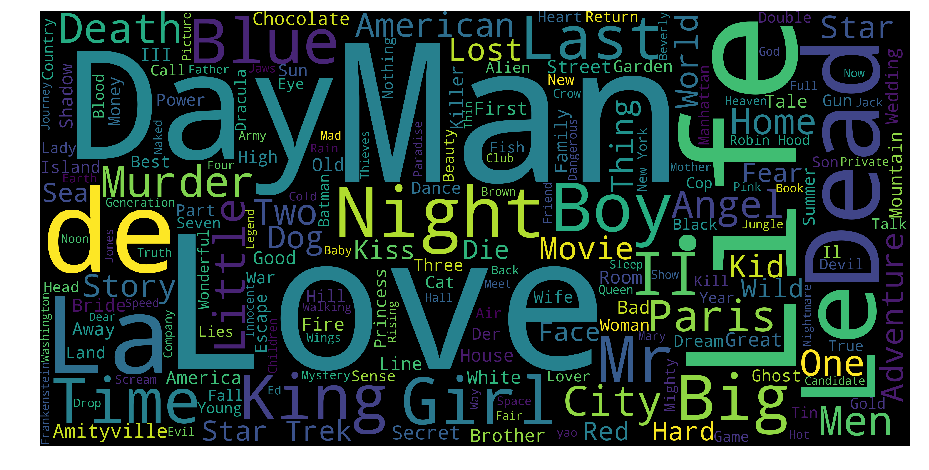

In [35]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', 
                            height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Day, Love, Life, Man, Dead are among the most commonly occuring words.

**2. Let's take a look at the summary statistics and distribution.**

In [36]:
# Get summary statistics of rating
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

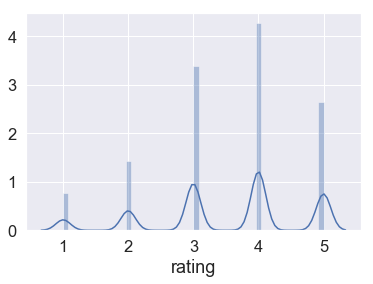

In [37]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

The users are quite generous in their ratings.<br>
The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5. However, a 5-level rating wasn’t a good indicator as people could have different rating styles (i.e. person A could always use 4 for an average movie, whereas person B only gives 4 out for their favorites). Each user rated at least 20 movies, so I doubt the distribution could be caused just by chance variance in the quality of movies.

**3. What are the 25 most rated movies?**

In [38]:
lens[['title','genres','rating']].sort_values('rating', ascending=False)[:25]
#lens.title.value_counts()[:25]

,title,genres,rating
50000,12 Angry Men (1957),Drama,5
66899,Amadeus (1984),Drama|Mystery,5
23608,Sense and Sensibility (1995),Drama|Romance,5
23604,Fargo (1996),Crime|Drama|Thriller,5
23603,Fly Away Home (1996),Adventure|Children,5
66880,12 Angry Men (1957),Drama,5
23601,Toy Story (1995),Animation|Children|Comedy,5
23600,L.A. Confidential (1997),Crime|FilmNoir|Mystery|Thriller,5
66881,"Godfather, The (1972)",Action|Crime|Drama,5
66887,Pulp Fiction (1994),Crime|Drama,5


In SQL, this would be equivalent to:

SELECT title, count(1) <br>
FROM lens <br>
GROUP BY title <br>
ORDER BY 2 DESC <br>
LIMIT 25;<br>


**4. Which movies are most highly rated?** <br>
Use the `agg` method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

In [106]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b39278>,
      dtype=object)

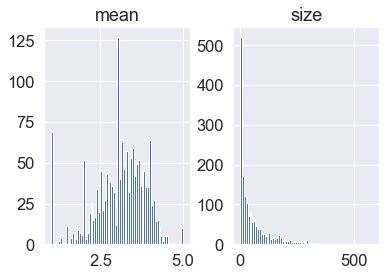

In [40]:
movie_stats['rating'].hist(bins=70)

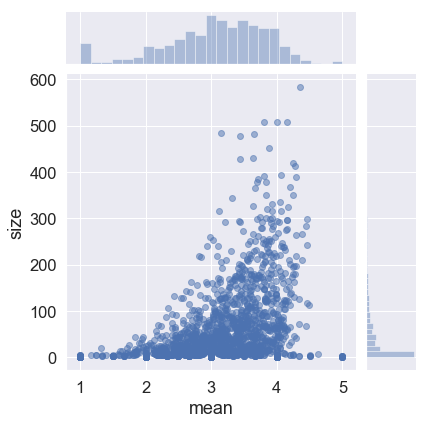

In [41]:
sns.jointplot(x='mean', y='size', data=movie_stats['rating'], alpha=0.5)

As seen above, the larger the number of ratings, the more likely the rating of a movie is. <br>
Here are **15 movies with the highest average rating**, requiring that they had at least 100 ratings:

In [80]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [90]:
movie_stats[atleast_100].sort_values([('rating', 'size')], ascending=False)[:15]

rating          
                                   size      mean
title                                            
Star Wars (1977)                    583  4.358491
Contact (1997)                      509  3.803536
Fargo (1996)                        508  4.155512
Return of the Jedi (1983)           507  4.007890
Liar Liar (1997)                    485  3.156701
English Patient, The (1996)         481  3.656965
Scream (1996)                       478  3.441423
Toy Story (1995)                    452  3.878319
Air Force One (1997)                431  3.631090
Independence Day (ID4) (1996)       429  3.438228
Raiders of the Lost Ark (1981)      420  4.252381
Godfather, The (1972)               413  4.283293
Pulp Fiction (1994)                 394  4.060914
Twelve Monkeys (1995)               392  3.798469
Silence of the Lambs, The (1991)    390  4.289744

The SQL equivalent would be:

SELECT title, COUNT(1) size, AVG(rating) mean <br>
FROM lens <br>
GROUP BY title <br>
HAVING COUNT(1) >= 100 <br>
ORDER BY 3 DESC <br>
LIMIT 15; <br>

**5. The 50 most rated movies**

In [92]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]
most_50.head()

movie_id
50     583
258    509
100    508
181    507
294    485
dtype: int64

The SQL to match this would be:<br>

CREATE TABLE most_50 AS ( <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; SELECT movie_id, COUNT(1) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; FROM lens <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; GROUP BY movie_id <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ORDER BY 2 DESC <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; LIMIT 50 <br>
); <br>

**6. Which movies are most controversial amongst different ages?**

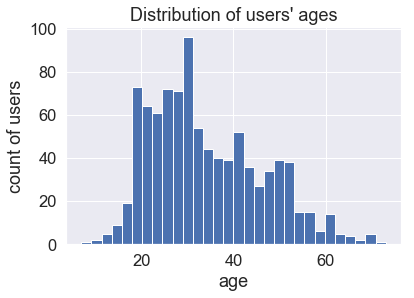

In [44]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

**7. Binning the users**<br>
`pandas.cut` allows you to bin numeric data. We first created labels to name our bins, then split our users into eight bins of ten years (0-9, 10-19, 20-29, etc.). Our use of `right=False` told the function that we wanted the bins to be exclusive of the max age in the bin (e.g. a 30 year old user gets the 30s label).

In [45]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,49,40-49
39,31,30-39
132,28,20-29
182,25,20-29
233,45,40-49
265,43,40-49
412,38,30-39
432,51,50-59
710,27,20-29
1096,33,30-39


**8. Compare ratings across age groups:**

In [46]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

Young users seem a bit more critical than other age groups.<br>
**9. The 50 most rated movies are viewed across each age group**

In [47]:
lens.set_index('movie_id', inplace=True)
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

We can transform this list into a table using `unstack` for easier observation. We unstacked the second index using `unstack(1)`, and then filled in NULL values with 0 using `fillna(0)`.

In [48]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


**10. Which movies do men and women most disagree on?**<br>

The SQL would be something like this:<br>

SELECT title, AVG(IF(sex = 'F', rating, NULL)), AVG(IF(sex = 'M', rating, NULL))<br>
FROM lens<br>
GROUP BY title;<br>

Panda’s `pivot_table` method makes these kinds of operations much easier 

In [49]:
lens.reset_index('movie_id', inplace=True)

In [50]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [51]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [52]:
pivoted.reset_index('movie_id', inplace=True)

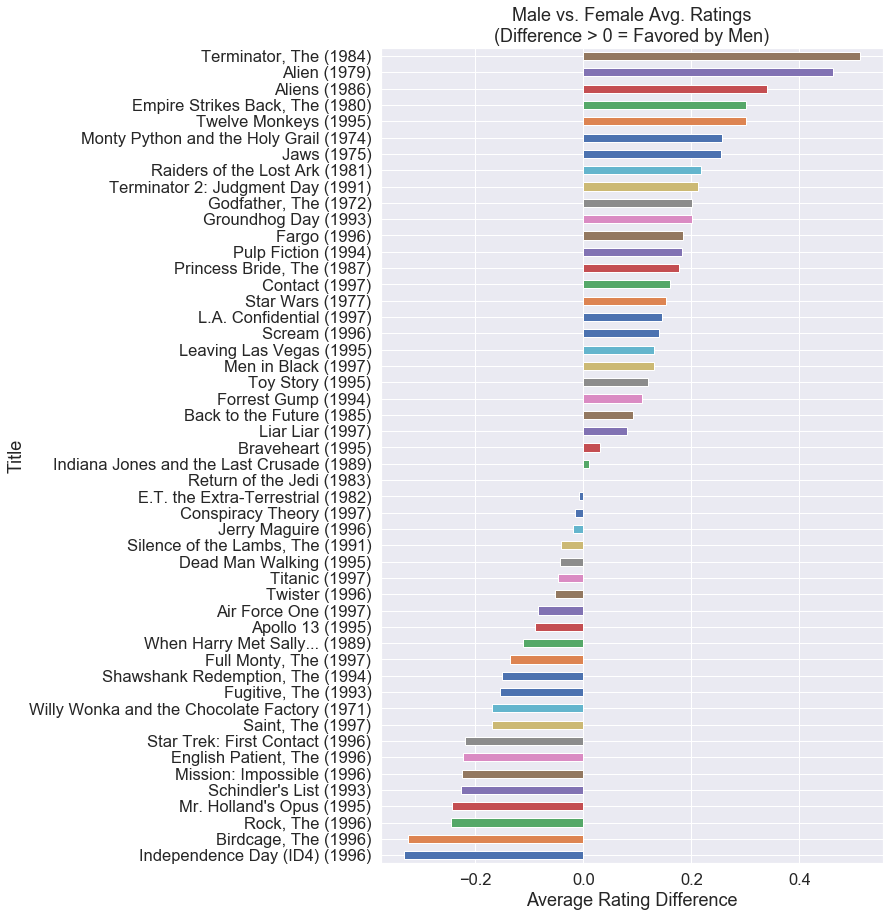

In [53]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

### B - Genres <br>
The genres variable will be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [69]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are 
# sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 725],
 ['Comedy', 505],
 ['Action', 251],
 ['Thriller', 251],
 ['Romance', 247]]

The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance. I'll show this on a wordcloud too in order to make it more visually appealing.

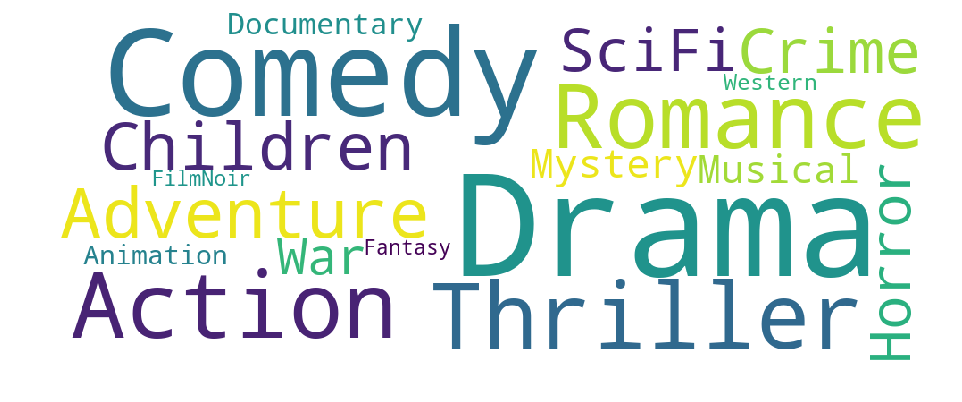

In [73]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()

## III. Types of Recommendation Engines
**1. Content-Based** <br>
The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.

A content based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

**2. Collaborative Filtering** <br>
The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.

## 1. Content-Based Recommendation Model
**Theory**<br>
The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the results of latest European Socccer games” on Google. It is certain that “the” will occur more frequently than “soccer games” but the relative importance of soccer games is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

Below is the equation to calculate the TF-IDF score: <br>
tfidf(t,d,D) = tf(t,d) × idf(t,D)

After calculating TF-IDF scores, how do we determine which items are closer to each other, rather closer to the user profile? This is accomplished using the **Vector Space Model** which computes the proximity based on the angle between the vectors. In this model, each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space and the angles between the vectors are calculated to determine the similarity between the vectors. Next, the user profile vectors are also created based on his actions on previous attributes of items and the similarity between an item and a user is also determined in a similar way.

**vector-space**<br>
Sentence 2 is more likely to be using Term 2 than using Term 1. Vice-versa for Sentence 1. The method of calculating this relative measure is calculated by taking the cosine of the angle between the sentences and the terms. The ultimate reason behind using cosine is that the value of cosine will increase with decreasing value of the angle between which signifies more similarity. The vectors are length normalized after which they become vectors of length 1 and then the cosine calculation is simply the sum-product of vectors.

**Implementation**<br>
With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file movies.

In [74]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

I do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively. In order to do so, I'll use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(1682, 110)

I will be using the [Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html) to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [76]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.        , 0.        , 0.06734117],
       [0.        , 1.        , 0.32342707, 0.12059346],
       [0.        , 0.32342707, 1.        , 0.        ],
       [0.06734117, 0.12059346, 0.        , 1.        ]])

I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [108]:
# Let find recommendations for movies
lens[['Star Wars (1977)' in i for i  in  lens.title]]

,movie_id,user_id,rating,timestamp,title,genres,age,sex,occupation,zip_code,age_group
89,50,63,4,875747292,Star Wars (1977),Action|Adventure|Romance|SciFi|War,31,M,marketing,75240,30-39
215,50,154,5,879138657,Star Wars (1977),Action|Adventure|Romance|SciFi|War,25,M,student,53703,20-29
347,50,296,5,884196469,Star Wars (1977),Action|Adventure|Romance|SciFi|War,43,F,administrator,16803,40-49
569,50,271,5,885848640,Star Wars (1977),Action|Adventure|Romance|SciFi|War,51,M,engineer,22932,50-59
888,50,201,4,884114471,Star Wars (1977),Action|Adventure|Romance|SciFi|War,27,M,writer,E2A4H,20-29
1113,50,209,5,883417589,Star Wars (1977),Action|Adventure|Romance|SciFi|War,33,F,educator,85710,30-39
1254,50,354,4,891216498,Star Wars (1977),Action|Adventure|Romance|SciFi|War,29,F,librarian,48197,20-29
1456,50,113,5,875076416,Star Wars (1977),Action|Adventure|Romance|SciFi|War,47,M,executive,95032,40-49
1619,50,1,5,874965954,Star Wars (1977),Action|Adventure|Romance|SciFi|War,24,M,technician,85711,20-29
1854,50,360,4,880354149,Star Wars (1977),Action|Adventure|Romance|SciFi|War,51,M,other,98027,50-59


In [77]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [78]:
genre_recommendations('Star Wars (1977)').head(20)

180                             Return of the Jedi (1983)
171                       Empire Strikes Back, The (1980)
270                              Starship Troopers (1997)
1238                              Cutthroat Island (1995)
497                             African Queen, The (1951)
473     Dr. Strangelove or: How I Learned to Stop Worr...
876                                 Excess Baggage (1997)
946                 Big Blue, The (Grand bleu, Le) (1988)
1449                               Golden Earrings (1947)
1514                              Wings of Courage (1995)
120                         Independence Day (ID4) (1996)
234                                  Mars Attacks! (1996)
147                    Ghost and the Darkness, The (1996)
173                        Raiders of the Lost Ark (1981)
209             Indiana Jones and the Last Crusade (1989)
265                             Kull the Conqueror (1997)
430                                     Highlander (1986)
490           

## Recommending Similar Movies

Let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. The NaN values are due to most people not having seen most of the movies.

In [54]:
moviemat = lens.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Let's choose two movies for our system: Starwars, a sci-fi movie. And Liar Liar, a comedy.
<br>**What are the user ratings for those two movies?**

In [55]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liar_liar_user_ratings = moviemat['Liar Liar (1997)']

In [56]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [57]:
liar_liar_user_ratings.head()

user_id
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
Name: Liar Liar (1997), dtype: float64

**Correlation of every other movie to that specific user behaviour on the StarWars movie**

In [58]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

**Correlation of every other movie to that specific user behaviour on the Liar Liar movie**

In [59]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

**Remove the NaN values and use a dataframe instead of Series**

In [60]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [61]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


**Perfectly correlated movies with StarWars?** <br>
Most likely these movies happen to have been seen only by one person who also happend to rate StarWars 5 stars

In [62]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


Set a threshold for the number of ratings necessary and filter out movies that have less than a certain number of reviews

In [63]:
# join the 'rating' column to our dataframe
corr_starwars = corr_starwars.join(movie_stats['rating'], how='left', lsuffix='_left', rsuffix='_right')
corr_starwars.head()

,Correlation,size,mean
title,,,
'Til There Was You (1997),0.872872,9,2.333333
1-900 (1994),-0.645497,5,2.600000
101 Dalmatians (1996),0.211132,109,2.908257
12 Angry Men (1957),0.184289,125,4.344000
187 (1997),0.027398,41,3.024390


Now, we filter out movies that have less than 100 reviews (this value was chosen based off the ratings histogram from earlier)

In [64]:
corr_starwars[corr_starwars['size']>100].sort_values('Correlation', ascending=False).head()

,Correlation,size,mean
title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,130,3.246154


**Perfectly correlated movies with Liar Liar?**<br>
We can used similar steps as above

In [65]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
#corr_liarliar.head()

In [66]:
corr_liarliar.dropna(inplace=True)

In [67]:
corr_liarliar = corr_liarliar.join(movie_stats['rating'], how='left',lsuffix='_left', rsuffix='_right')
#corr_liarliar.head()

In [68]:
corr_liarliar[corr_liarliar['size']>100].sort_values('Correlation', ascending=False).head()

,Correlation,size,mean
title,,,
Liar Liar (1997),1.000000,485,3.156701
Batman Forever (1995),0.516968,114,2.666667
"Mask, The (1994)",0.484650,129,3.193798
Down Periscope (1996),0.472681,101,2.702970
Con Air (1997),0.469828,137,3.459854
